In [45]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

data = pd.read_pickle('final_data_clean.p')


In [108]:
socioeconomic_vars = ['Black_Pct','Hispanic_Pct','LowAccess_Pct','HouseholdIncome']
store_vars = ['SuperCenters_PP','SpecialtyStores_PP','FarmerMarkets_PP','GroceryStores_PP']

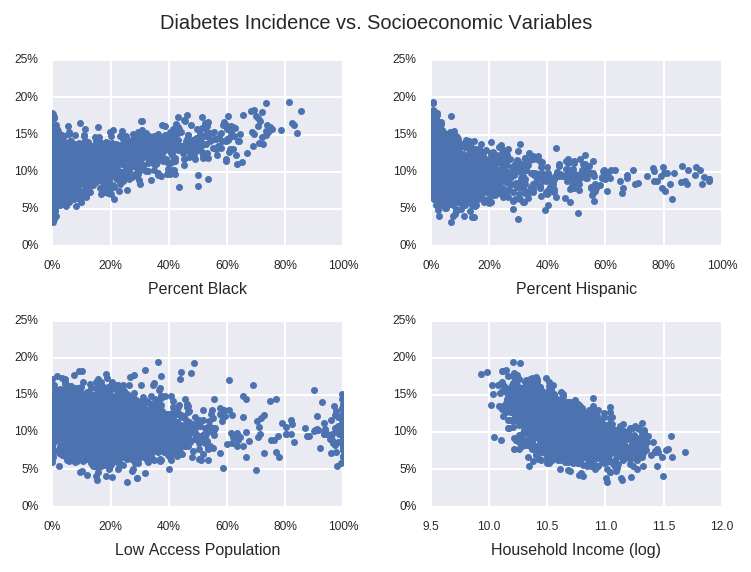

In [109]:
def update_allabels_pcts(ax):
    xlabels = ['{:0.0%}'.format(label) for label in ax.get_xticks()]
    ax.set_xticklabels(xlabels)
    
    ylabels = ['{:0.0%}'.format(label) for label in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

def update_ylabels_pcts(ax):  
    ylabels = ['{:0.0%}'.format(label) for label in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    
col_to_title = {'White_Pct': 'Percent White', 'Black_Pct' : 'Percent Black','Hispanic_Pct' : 'Percent Hispanic'
                ,'LowAccess_Pct' : 'Low Access Population', 'HouseholdIncome' : 'Household Income (log)'}
fig = plt.figure()
fig.suptitle('Diabetes Incidence vs. Socioeconomic Variables', fontsize=10)
for i, col in enumerate(data[socioeconomic_vars]):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_autoscale_on(False)
    ax.plot(data[col], data["Diabetes_Pct"],'.')
    
    ax.set_xlabel(col_to_title[col], fontsize=8)
    ax.grid(True)
    
    ax.tick_params(labelsize=6)
    if col != 'HouseholdIncome':
        ax.axis([0,1,0,.25])
        update_allabels_pcts(ax)
        
        
    else:
        ax.axis([9.5,12,0,.25])
        update_ylabels_pcts(ax)

        

fig.subplots_adjust(wspace=0.3, hspace=0.4)



In [112]:
LowAccess = data[data['LowAccess_Pct'] > data['LowAccess_Pct'].quantile(0.65)]
HighAccess = data[data['LowAccess_Pct'] <= data['LowAccess_Pct'].quantile(0.65)]

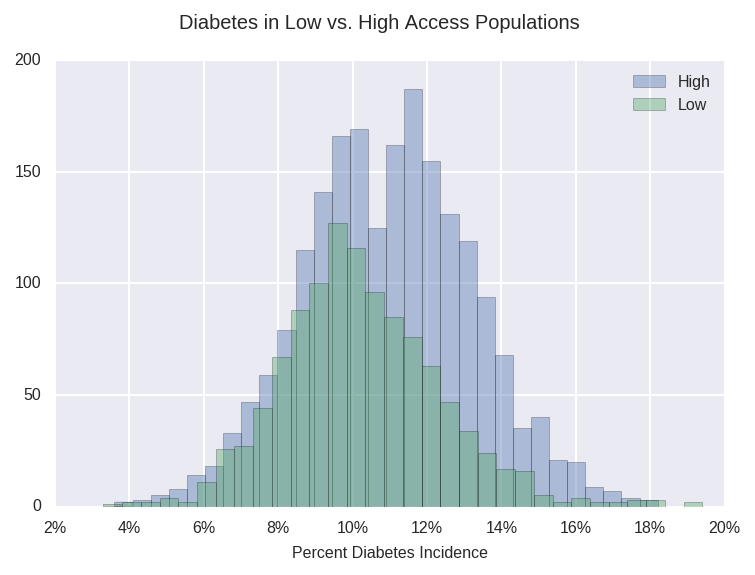

In [113]:
fig, ax = plt.subplots()

sns.distplot(HighAccess['Diabetes_Pct'], ax=ax, kde=False, label = "High")
sns.distplot(LowAccess['Diabetes_Pct'], ax=ax, kde=False, label = "Low")
fig.suptitle('Diabetes in Low vs. High Access Populations', fontsize=10)
ax.legend(fontsize=8)
xlabels = ['{:0.0%}'.format(label) for label in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.tick_params(labelsize=8)
ax.set_xlabel('Percent Diabetes Incidence', fontsize=8)

In [114]:
import statsmodels.api as sm

est = sm.OLS(LowAccess['Diabetes_Pct'],LowAccess[[#'LowAccess_Pct',
#'White_Pct',
'Black_Pct',
'Hispanic_Pct',
'HouseholdIncome',
'SuperCenters_PP',
'SpecialtyStores_PP',
'FarmerMarkets_PP',
'GroceryStores_PP']]).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Diabetes_Pct   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     4486.
Date:                Wed, 28 Sep 2016   Prob (F-statistic):               0.00
Time:                        22:40:07   Log-Likelihood:                 2783.6
No. Observations:                1098   AIC:                            -5553.
Df Residuals:                    1091   BIC:                            -5518.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Black_Pct              0.0768      0.004     17.845      0.000         0.068     0.085
Hispanic_Pct          -0.0153      0.004     -3.847      0.000        -0.023    -0.007
HouseholdIncome        0.0093      0.000     72.981      0.000         0.009     0.010
SuperCenters_PP       -0.0019      0.003     -0.690      0.490        -0.007     0.003
SpecialtyStores_PP    -0.0035      0.001     -4.479      0.000        -0.005    -0.002
FarmerMarkets_PP       0.0003      0.001      0.504      0.615        -0.001     0.001
GroceryStores_PP       0.0001      0.000      0.671      0.502        -0.000     0.001
==============================================================================
Omnibus:                       11.023   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.324
Skew:                           0.148   Prob(JB):                      0.00128
Kurtosis:                       3.451   Cond. No.                         86.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
est = sm.OLS(HighAccess['Diabetes_Pct'],HighAccess[[#'LowAccess_Pct',
#'White_Pct',
'Black_Pct',
'Hispanic_Pct',
'HouseholdIncome',
'SuperCenters_PP',
'SpecialtyStores_PP',
'FarmerMarkets_PP',
'GroceryStores_PP']]).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Diabetes_Pct   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     9254.
Date:                Wed, 28 Sep 2016   Prob (F-statistic):               0.00
Time:                        22:40:26   Log-Likelihood:                 5132.4
No. Observations:                2039   AIC:                        -1.025e+04
Df Residuals:                    2032   BIC:                        -1.021e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Black_Pct              0.0754      0.003     24.881      0.000         0.069     0.081
Hispanic_Pct          -0.0474      0.004    -12.726      0.000        -0.055    -0.040
HouseholdIncome        0.0102      0.000    100.747      0.000         0.010     0.010
SuperCenters_PP        0.0033      0.002      1.714      0.087        -0.000     0.007
SpecialtyStores_PP    -0.0084      0.001    -12.237      0.000        -0.010    -0.007
FarmerMarkets_PP      -0.0032      0.001     -4.609      0.000        -0.005    -0.002
GroceryStores_PP       0.0010      0.000      3.115      0.002         0.000     0.002
==============================================================================
Omnibus:                       15.563   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.935
Skew:                          -0.108   Prob(JB):                     4.69e-05
Kurtosis:                       3.434   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

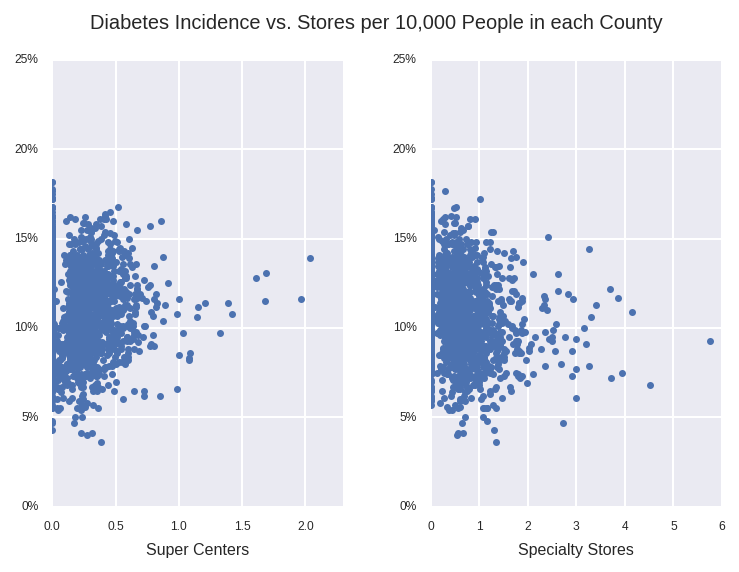

In [116]:
def update_allabels_pcts(ax):
    
    ylabels = ['{:0.0%}'.format(label) for label in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

col_to_title = {'SuperCenters_PP': 'Super Centers', 'SpecialtyStores_PP' : 'Specialty Stores'
                ,'FarmerMarkets_PP' : 'Farmer\'s Markets', 'GroceryStores_PP' : 'Grocery Stores'}

col_to_dims = {'SuperCenters_PP': [0,2.3,0,.25], 'SpecialtyStores_PP' : [0,6,0,.25]}
fig = plt.figure()
fig.suptitle('Diabetes Incidence vs. Stores per 10,000 People in each County', fontsize=10)
for i, col in enumerate(HighAccess[['SuperCenters_PP','SpecialtyStores_PP']]):
    ax = fig.add_subplot(1, 2, i+1)
    #ax.set_autoscale_on(False)
    ax.plot(HighAccess[col], HighAccess["Diabetes_Pct"],'.')
    
    ax.set_xlabel(col_to_title[col], fontsize=8)
    ax.grid(True)
    
    ax.tick_params(labelsize=6)
    
    ax.axis(col_to_dims[col])
    update_allabels_pcts(ax)


        

fig.subplots_adjust(wspace=0.3, hspace=0.4)

https://helelily.carto.com/viz/66be397a-800a-11e6-ba03-0e233c30368f/embed_map